In [1]:
import csv
from scipy import interpolate

import numpy as np
import matplotlib.pyplot as plt


def spectraReader(file_path):
    content = []
    with open(file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            content.append(row)
    
    content = content[3:]

    x = [float(item[0]) for item in content][::-1] 
    y = [float(item[1]) for item in content][::-1]

    x_new = np.arange(np.floor(min(x)), np.ceil(max(x)) + 0.1, 0.1)
    cs = interpolate.CubicSpline(x, y)
    y_new = cs(x_new)

    while x_new[0] > 400:
        x_new = np.concatenate((np.array([x_new[0] - 0.1]), x_new))
        y_new = np.concatenate((np.array([0]), y_new))
    
    while len(x_new) < 36000:
        x_new = np.concatenate((x_new, np.array([x_new[-1] + 0.1])))
        y_new = np.concatenate((y_new, np.array([0])))
 
    return x_new, y_new

class Chemical:
    def __init__(self, name, filename, mass, minConc, maxConc, folder="Spectral Data/"):
        self.name = name
        self.mass = mass
        self.minConc = minConc
        self.maxConc = maxConc
        self.filename = filename
        self.relativeIntensity = 1
        
        wavenumber, intensity = spectraReader(folder + filename)
        self.wavenumber = wavenumber
        self.intensity = intensity
    def plot(self):
        plt.plot(self.wavenumber, self.intensity)
        plt.title(self.name)
        plt.xlabel("wavenumbers / cm-1")
        plt.ylabel("absorbance")
        plt.show()


def ChemicalConcentrationReader(file_path="Blood Chemical Concentration.csv", spectraFolder="Spectral Data/"):
    content = []
    with open(file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            content.append(row)
    
    content = content[1:]

    data = []
    for row in content:
        name = row[0]
        filename = row[1]
        mass = float(row[2])
        minConc = float(row[3])
        maxConc = float(row[4])
        chemical = Chemical(
            name,
            filename,
            mass,
            minConc,
            maxConc,
            spectraFolder
        )
        data.append(chemical)

    maxMass = max(data, key=lambda x: x.mass)
    maxMass = maxMass.mass

    for item in data:
        item.relativeIntensity = item.mass/maxMass
    return data


In [2]:
import random, pickle

class Blood:
    def __init__(self, chemicals):
        self.wavenumber = np.arange(400, 4000, 0.1)
        self.absorption = np.zeros(len(self.wavenumber))

        self.composition = []

        concentrations = [random.uniform(chemical.minConc, chemical.maxConc) for chemical in chemicals]
        self.setConc(chemicals, concentrations)

    def setConc(self, chemicals, concentrations):
        self.absorption = np.zeros(len(self.wavenumber))
        for i in range(len(chemicals)):
            chemical = chemicals[i]
            concentration = concentrations[i]
            absorption_ =  concentration * chemical.relativeIntensity * chemical.intensity    
            self.absorption += absorption_
            composition_ = {
                "chemical": chemical.name,
                "concentration": concentration
            }
            self.composition.append(composition_)
        

        max_value = max(self.absorption)
        normalized_lst = []
        for value in self.absorption:
            normalized_value = value / max_value
            normalized_lst.append(normalized_value)
        self.absorption = normalized_lst

        self.transmittance = [ 10**(-1 * item) for item in self.absorption]

        max_value = max(self.transmittance)
        normalized_lst = []
        for value in self.transmittance:
            normalized_value = value / max_value
            normalized_lst.append(normalized_value)
        self.transmittance = normalized_lst
        
    def plot(self, overlap="separate", type="transmittance"):
        if overlap == "separate":
            fig, ax = plt.subplots()
            ax.plot(self.wavenumber, self.transmittance)
            ax.invert_xaxis()
            ax.set_xlabel("wavenumbers / cm-1")
            ax.set_ylabel("Transmittance")
        else:
            plt.plot(self.wavenumber, self.transmittance, alpha=0.5)
            plt.xlabel("wavenumbers / cm-1")
            plt.ylabel("Transmittance")
    
    def save(self, filename, folder):
        data = {
            "wavenumber": self.wavenumber,
            "intensity": self.intensity,
            "composition": self.composition
        }
        data_pickle = pickle.dumps(data)

        filePath = folder + str(filename) + ".pickle"
        log = open(filePath, "wb")
        log.write(data_pickle)
        log.flush()
    

In [3]:
chemicals = ChemicalConcentrationReader()

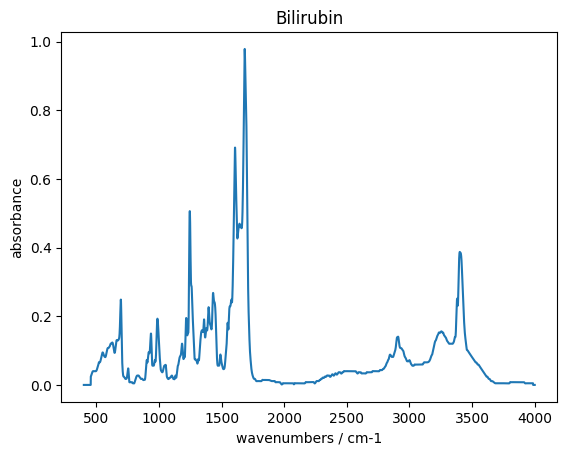

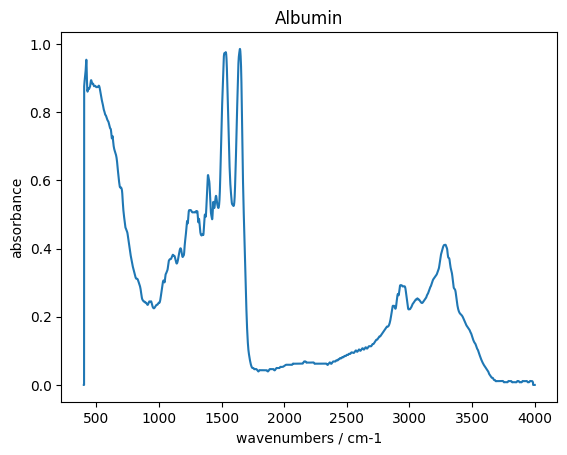

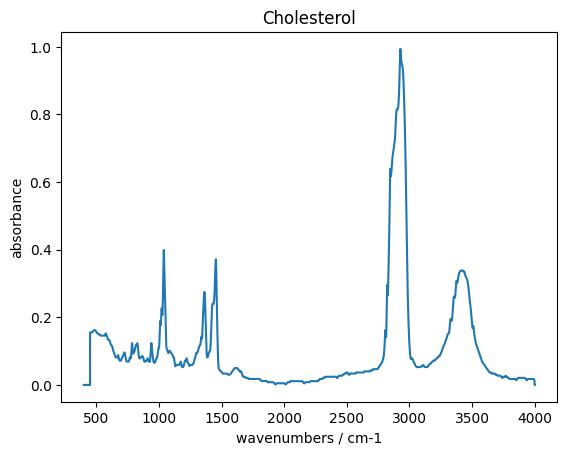

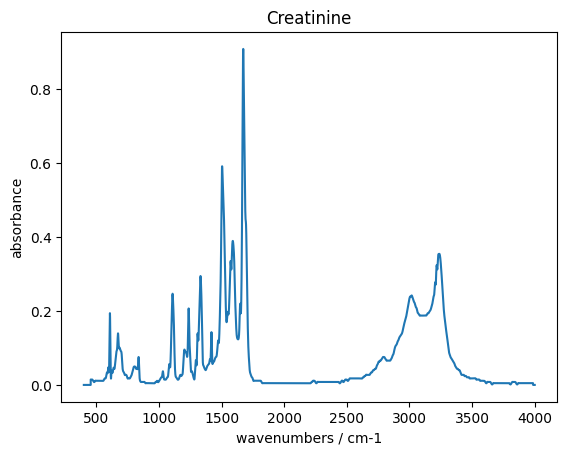

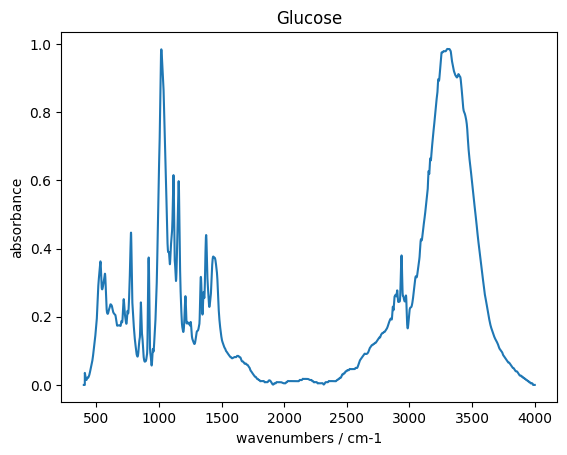

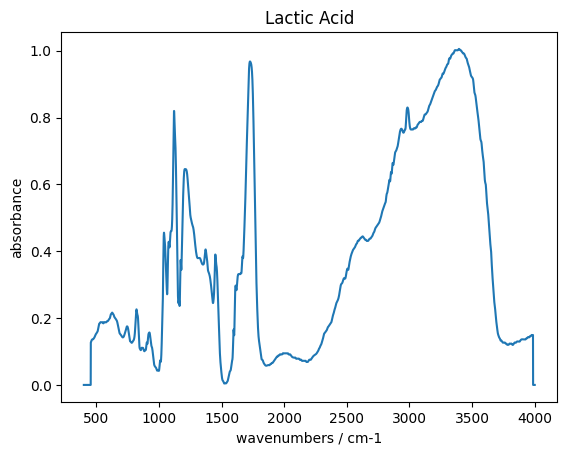

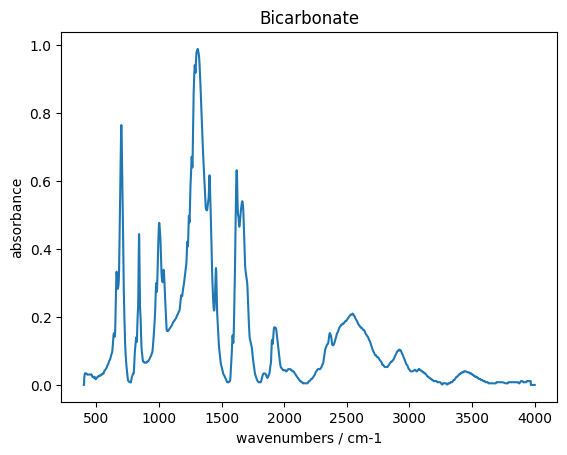

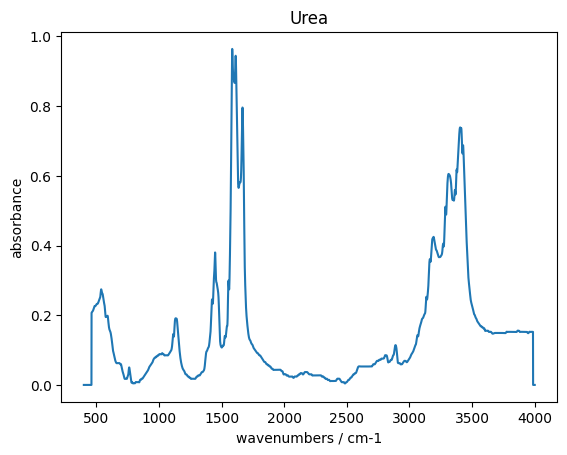

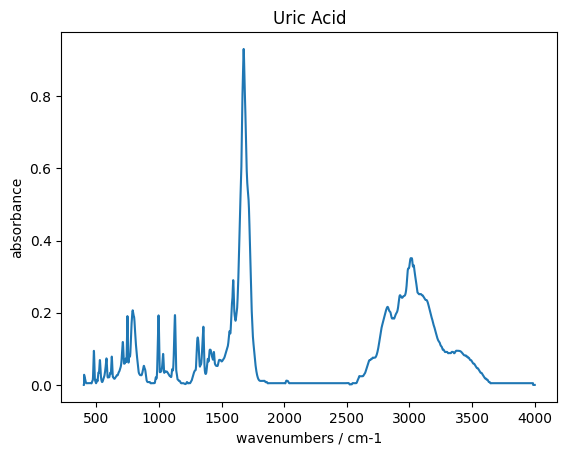

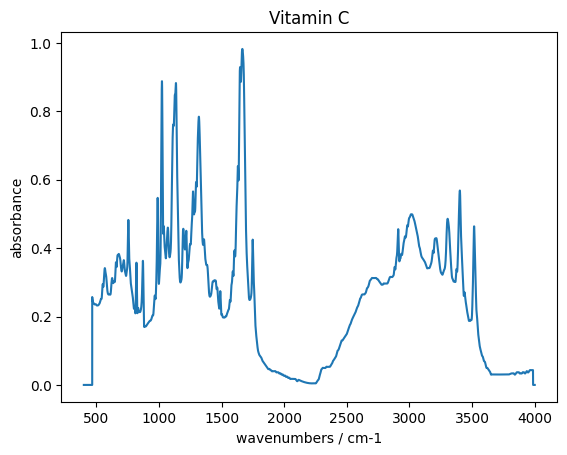

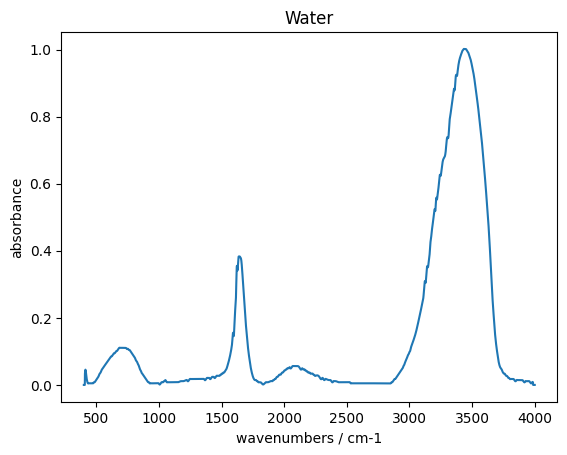

In [4]:
for chemical in chemicals:
    chemical.plot()

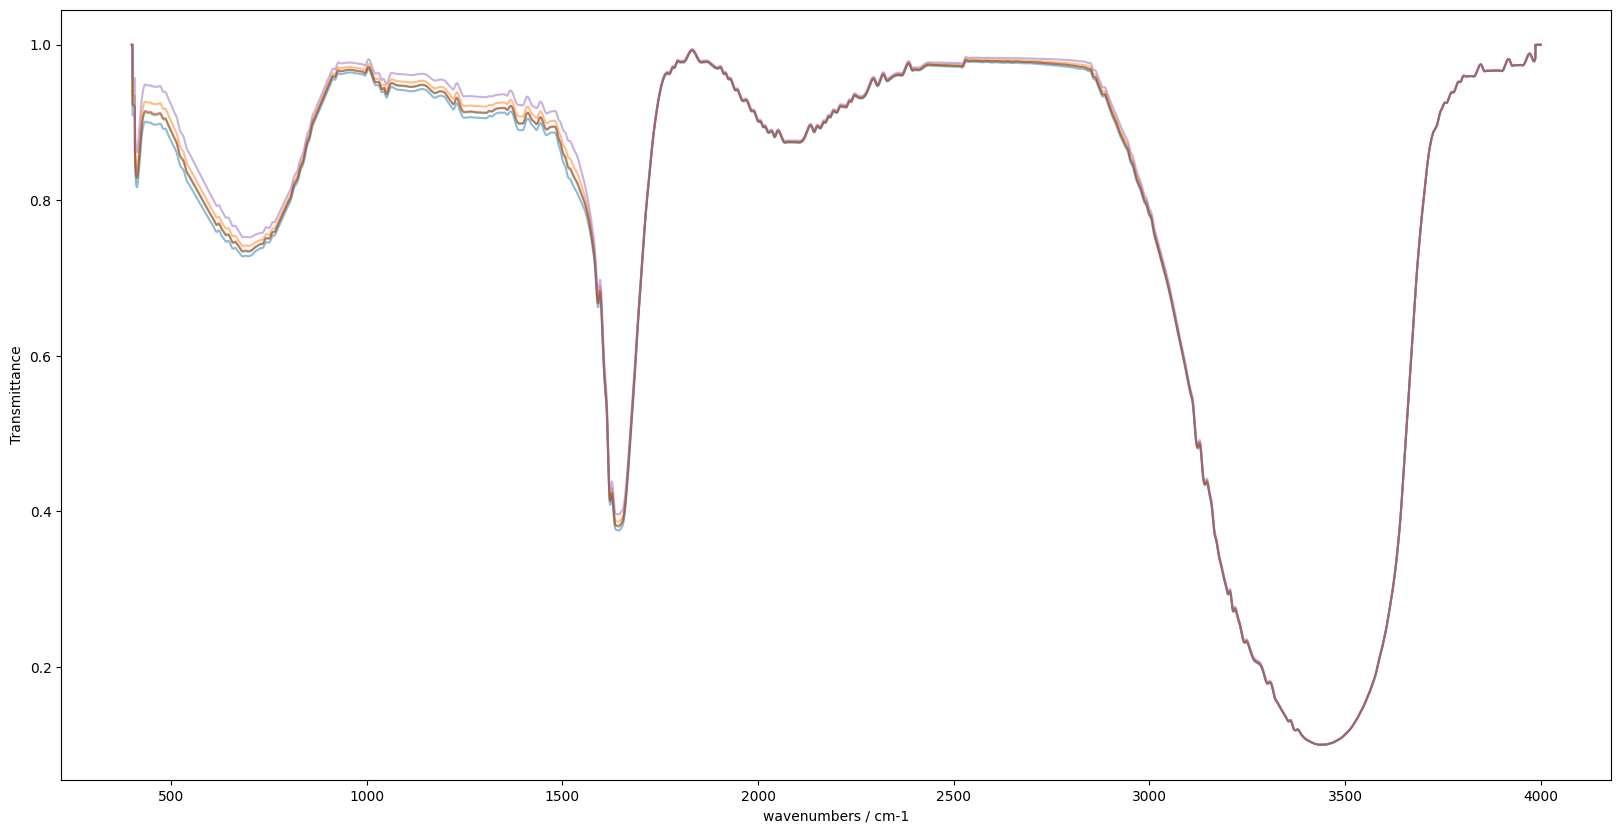

In [5]:
plt.figure(figsize=(20, 10))
for i in range(5):
    a = Blood(chemicals)
    a.plot("overlap")

In [6]:
a = RandomBlood(chemicals)
a.save("Randon Blood Challenge", "")

NameError: name 'RandomBlood' is not defined

In [ ]:
b = open("Randon Blood Challenge.pickle", "rb").read()
b_data = pickle.loads(b)

In [ ]:
b = RandomBlood(chemicals)
data = {
    "wavenumber": b.wavenumber,
    "intensity": b.intensity
}
data = pickle.dumps(data)
log =  open("Randon Blood Challenge.pickle", "wb")
log.write(data)
log.flush()